# Introduction to Topic Modeling

In today's lesson, we're going to be working on method of text analysis called "topic modeling".

- [Part 1: What is a topic model?](#Part-1:-What-is-a-topic-model?)
- [Part 2: Topic Modeling Historical *New York Times* Obituaries (1852-2007)](#Part-2:-Topic-Modeling-Historical-*New-York-Times*-Obituaries-(1852-2007))
- [Part 3: Visualizing topic modeling results](#Part-3:-Visualizing-topic-modeling-results)



## Part 1: What is a topic model?

![image](../_images/blei-lda.png)
From David Blei, "Probablistic topic modeling" (2012)

How do I "topic model"?

1. [**MALLET: MAchine Learning for LanguagE Toolkit**](http://mallet.cs.umass.edu/index.php)
    - ![image](../_images/MALLET.png)


2. **David Mimno's in-browswer topic model:**
    - ![image](../_images/mimno-browser1.png)

    - ![image](../_images/mimno-browser2.png)


3. **Today: Topic Modeling using MALLET within Python**

A Note:
1. You can follow along with today's tutiral in Binder
2. You can download this notebook and run it on your own machine.

If you are running this notebook in the cloud, all of the necessary software has already been downloaded. 

If you are running this notebook locally, you need to have a few things installed:
- See [Instructions on how to install Java Development Kit, MALLET,  little_mallet_wrapper and seaborn](https://github.com/sceckert/IntroDHSpring2021/blob/main/_week9/topic-modeling-set-up-instructions.md)



## Part 2: Topic Modeling Historical *New York Times* Obituaries (1852-2007)

## Let's get started!

In this particular lesson, we’re going to use [Little MALLET Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper), a Python wrapper for [MALLET](http://mallet.cs.umass.edu/index.php), to topic model 379 obituaries of significant historical figures published by *The New York Times*. This dataset is based on data originally collected by Matt Lavin for his Programming Historian [TF-IDF tutorial](https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf). Melanie Walsh cleaned the obituaries so that the subject’s name and death year is included in each text file name, added 13 more “Overlooked” obituaries, including Karen Spärck Jones, the computer scientist who introduced TF-IDF. 

This dataset can be found on our GitHub page under "_datasets/texts/history/NYT-Obituaries"


## Import Packages

In [2]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

## Set the path to MALLET
Note: if you're running this notebook on your *local* machine, you need to replace the path below with the path to mallet on your own machine. Run the cell below

In [3]:
path_to_mallet = 'mallet-2.0.8bin/mallet'

## Define our corpus of texts
In this workshop, we'll be working on a dataset of NYT Obituaries, produced by Matt Lavin as part of his TF-IDF workshop, with a few recent additions added by Melanie Walsh

In [4]:
# Make a variable and assign it to the path to our directory that contains our text files
directory = "../_datasets/texts/history/NYT-Obituaries/"

Using the `glob` function and the wildcard `*`, we're going to make a list of all the text files in our directory.

In [5]:
files = glob.glob(f"{directory}/*.txt")

In [6]:
files

['../_datasets/texts/history/NYT-Obituaries/1945-Adolf-Hitler.txt',
 '../_datasets/texts/history/NYT-Obituaries/1915-F-W-Taylor.txt',
 '../_datasets/texts/history/NYT-Obituaries/1975-Chiang-Kai-shek.txt',
 '../_datasets/texts/history/NYT-Obituaries/1984-Ethel-Merman.txt',
 '../_datasets/texts/history/NYT-Obituaries/1953-Jim-Thorpe.txt',
 '../_datasets/texts/history/NYT-Obituaries/1964-Nella-Larsen.txt',
 '../_datasets/texts/history/NYT-Obituaries/1955-Margaret-Abbott.txt',
 '../_datasets/texts/history/NYT-Obituaries/1984-Lillian-Hellman.txt',
 '../_datasets/texts/history/NYT-Obituaries/1959-Cecil-De-Mille.txt',
 '../_datasets/texts/history/NYT-Obituaries/1928-Mabel-Craty.txt',
 '../_datasets/texts/history/NYT-Obituaries/1973-Eddie-Rickenbacker.txt',
 '../_datasets/texts/history/NYT-Obituaries/1989-Ferdinand-Marcos.txt',
 '../_datasets/texts/history/NYT-Obituaries/1991-Martha-Graham.txt',
 '../_datasets/texts/history/NYT-Obituaries/1997-Deng-Xiaoping.txt',
 '../_datasets/texts/history/N

## Process our text files
Next we're going to use the wrapper "little_mallet_wrapper" to process our text files and create two variables, "training_data" and "original_texts". We'll be using these variables to tell MALLET what to use as training data, and a copy of our original texts that we can refer back to.

The code we'll use to run this is: `little_mallet_wrapper.process_string(text, numbers='remove')`

 First, we're going to create an empty string, and then iterate over all the files in our `files` variable, processing each of them with the function `little_mallet_wrapper.process_string(text, numbers='remove')`, which takes all our text, makes the text lowercase, removes stopwords

> For the list of stopwords that mallet removes, and to change them, look inside the directory "mallet-2.0.8/stoplists"  
> What implications might that have for our model?

In [7]:
training_data = []
for file in files:
    text = open(file, encoding='utf-8').read()
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    training_data.append(processed_text)

In [8]:
original_texts = []
for file in files:
    text = open(file, encoding='utf-8').read()
    original_texts.append(text)

## Process the titles of obituaries
Since our text files all contain the year and name of the individual in them, we're going to use the filename as part of the way we label the text of that obituary.

In [9]:
obit_titles = [Path(file).stem for file in files]
# The Path().stem function extract the filename without the .txt extension

In [10]:
obit_titles

['1945-Adolf-Hitler',
 '1915-F-W-Taylor',
 '1975-Chiang-Kai-shek',
 '1984-Ethel-Merman',
 '1953-Jim-Thorpe',
 '1964-Nella-Larsen',
 '1955-Margaret-Abbott',
 '1984-Lillian-Hellman',
 '1959-Cecil-De-Mille',
 '1928-Mabel-Craty',
 '1973-Eddie-Rickenbacker',
 '1989-Ferdinand-Marcos',
 '1991-Martha-Graham',
 '1997-Deng-Xiaoping',
 '1938-George-E-Hale',
 '1885-Ulysses-Grant',
 '1909-Sarah-Orne-Jewett',
 '1957-Christian-Dior',
 '1987-Clare-Boothe-Luce',
 '1976-Jacques-Monod',
 '1954-Getulio-Vargas',
 '1979-Stan-Kenton',
 '1990-Leonard-Bernstein',
 '1972-Jackie-Robinson',
 '1998-Fred-W-Friendly',
 '1991-Leo-Durocher',
 '1915-B-T-Washington',
 '1997-James-Stewart',
 '1981-Joe-Louis',
 '1983-Muddy-Waters',
 '1942-George-M-Cohan',
 '1989-Samuel-Beckett',
 '1962-Marilyn-Monroe',
 '2000-Charles-M-Schulz',
 '1967-Gregory-Pincus',
 '1894-R-L-Stevenson',
 '1978-Bruce-Catton',
 '1982-Arthur-Rubinstein',
 '1875-Andrew-Johnson',
 '1974-Charles-Lindbergh',
 '1964-Rachel-Carson',
 '1953-Marjorie-Rawlings',


## Get Statistics on our Training Dataset
The `little_mallet_wrapper.print_dataset_stats()` function gives us some basic statistics on the dataset we want to use as our training data.

In [11]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 379
Mean Number of Words per Document: 1314.6
Vocabulary Size: 35983


## Training the Topic Model
Now for the big part!  We're going to use the variables we defined.
Before we can do that, we need to define some variables. We need to tell our model:

- How many topics to find
- What our training data is
- The location of a directory to output our topic modeling data (including sub-directories

And we need to import all this information into Little MALLET Wrapper



### Set the Number of Topics

In [12]:
num_topics = 15 # Change this number to change the number of topics

### Set the Training Data

In [13]:
training_data = training_data

### Set the Location of the Topic Model Output Files

Topic modeling produces a lot of output files, including the words in topics, and statistics on their relative distributions within the documents. We need to tell Little MALLET Wrapper where to output all of these results. The code below defines a directory called “topic-model-output” and a subdirectory called “NYT-Obits”, all of which will be inside your current directory. 

Notice how we're able to us re-use the path we defined, "output_directory_path" to tell Little MALLET Wrapper where to upt each of the 5 output files.

In [14]:
#Change to your desired output directory
output_directory_path = 'topic-model-output/NYT-Obits'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

### Import our Data into Little MALLET Wrapper
Here we're importing the variables we just defined into Little MALLET Wrapper

In [63]:
little_mallet_wrapper.import_data(path_to_mallet,
                path_to_training_data,
                path_to_formatted_training_data,
                training_data)

Importing data...
Complete


### Train the Topic Model

The final and most important step: we're going to use `little_mallet_wrapper.train_topic_model()` to train our model (using all of the parameters that we just defined. The topic model should take about 45 seconds to 1 minute to fully train and complete. 

If you're running this notebook locally (not in the cloud), you can look at your Terminal or PowerShell while it’s running and see what the model looks like as it trains.

In [15]:
little_mallet_wrapper.train_topic_model(path_to_mallet,
                      path_to_formatted_training_data,
                      path_to_model,
                      path_to_topic_keys,
                      path_to_topic_distributions,
                      num_topics)

Training topic model...
Complete


## Display Topics and Top Words
To examine the 15 topics that the topic model extracted from the NYT obituaries, run the cell below. This code uses the `little_mallet_wrapper.load_topic_keys()` function to read and process the MALLET topic model output from your computer, specifically the file “mallet.topic_keys.15”.

Take a look at the topics below. Think about what each topic seems to capture. 

- Are there any that seem to have a clear theme? 
- What about any oddities or outliers?

In [16]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['king', 'israel', 'black', 'moses', 'negro', 'peace', 'white', 'said', 'arab', 'jewish', 'president', 'israeli', 'luce', 'begin', 'state', 'sadat', 'egypt', 'kennedy', 'minister', 'civil']

✨Topic 1✨

['company', 'business', 'ford', 'oil', 'rockefeller', 'work', 'hill', 'world', 'building', 'carnegie', 'cleveland', 'built', 'president', 'workers', 'great', 'farm', 'getty', 'barnum', 'million', 'wright']

✨Topic 2✨

['years', 'new', 'first', 'american', 'york', 'mrs', 'two', 'later', 'died', 'became', 'year', 'born', 'said', 'time', 'home', 'last', 'father', 'death', 'went', 'one']

✨Topic 3✨

['baseball', 'louis', 'game', 'team', 'won', 'ruth', 'year', 'first', 'tennis', 'world', 'football', 'league', 'abbott', 'club', 'record', 'champion', 'black', 'three', 'golf', 'babe']

✨Topic 4✨

['music', 'band', 'jazz', 'piano', 'musical', 'sinatra', 'composer', 'goodman', 'orchestra', 'playing', 'played', 'stravinsky', 'bernstein', 'armstrong', 'musicians', 'style', 'first', 'conce

----


## Exercise 1: Training topics

## Your Turn!!
1. Change the number of topics (`num_topics`) from 15 to some other number
2. Then, run command to train the topic model `little_mallet_wrapper.train_topic_model()`
3. Then, re-reun the code in the cell above to display the topics and top numbers.
4. How did your choice do you notice? What implications might this have for someone who wants to use a topic model?

When you're done, change the number of topics back to 15, and re-train the model.

----

## Load Topic Distributions

MALLET also calculates the likely mixture of these topics for every single obituary in the corpus. This mixture is really a probability distribution, that is, the probability that each topic exists in the document. We can use these probability distributions to examine which of the above topics are strongly associated with which specific obituaries.

To get the topic distributions, we’re going to use the little_mallet_wrapper.load_topic_distributions() function, which will read and process the MALLET topic model output, specifically the file “mallet.topic_distributions.15”, as a dataframe.

In [17]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

We can use this dataframe that we just created to look at the probability distributions of each of the 15 toipcs in on obituary.

Let's look at Marilyn Monroe's obituary, which is #32

In [18]:
topic_distributions[32]

[0.0020671834625322996,
 0.003617571059431525,
 0.1462532299741602,
 0.03772609819121447,
 0.0144702842377261,
 0.00516795865633075,
 0.0578811369509044,
 0.003617571059431525,
 0.00516795865633075,
 0.28423772609819126,
 0.15555555555555556,
 0.2501291989664083,
 0.020671834625323,
 0.003617571059431525,
 0.009819121447028423]

It's a little hard to get a sense of what these topics are, so we can pair this with the data we have on the title and the top words in the topic:

In [19]:
obituary_to_check = "1962-Marilyn-Monroe"

obit_number = obit_titles.index(obituary_to_check)

print(f"Topic Distributions for {obit_titles[obit_number]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[obit_number])):
    print(f"✨Topic {topic_number} {topic[:6]} ✨\nProbability: {round(topic_distribution, 3)}\n")

Topic Distributions for 1962-Marilyn-Monroe

✨Topic 0 ['king', 'israel', 'black', 'moses', 'negro', 'peace'] ✨
Probability: 0.002

✨Topic 1 ['company', 'business', 'ford', 'oil', 'rockefeller', 'work'] ✨
Probability: 0.004

✨Topic 2 ['years', 'new', 'first', 'american', 'york', 'mrs'] ✨
Probability: 0.146

✨Topic 3 ['baseball', 'louis', 'game', 'team', 'won', 'ruth'] ✨
Probability: 0.038

✨Topic 4 ['music', 'band', 'jazz', 'piano', 'musical', 'sinatra'] ✨
Probability: 0.014

✨Topic 5 ['war', 'united', 'states', 'world', 'country', 'government'] ✨
Probability: 0.005

✨Topic 6 ['book', 'published', 'work', 'art', 'wrote', 'life'] ✨
Probability: 0.058

✨Topic 7 ['soviet', 'party', 'mao', 'china', 'communist', 'union'] ✨
Probability: 0.004

✨Topic 8 ['president', 'roosevelt', 'court', 'state', 'house', 'truman'] ✨
Probability: 0.005

✨Topic 9 ['one', 'would', 'man', 'time', 'made', 'could'] ✨
Probability: 0.284

✨Topic 10 ['miss', 'film', 'theater', 'movie', 'broadway', 'films'] ✨
Probabil

> **💡 CHECK-IN:**  
> Remember, these are PROBABILITIES. Each time that we re-run the model, the probabiliites will change slightly as the model trains.

> **EXERCISE**  
1. Run the "Train the Topic Model" command again
2. Then click on the cell above to output the topic distributions for Marylin Monroe's obituary. 
3. What do you notice? What changed? And what implications might this have for how we use these distribution statistics? 

## Part 3: Visualizing topic modeling results

### Create a Heatmap of Topics and Texts

We can visualize and compare these topic probability distributions with a heatmap by using the `little_mallet_wrapper.plot_categories_by_topics_heatmap()` function.

We have everything we need for the heatmap except for our list of target_labels, the sample of texts that we’d like to visualize and compare with the heatmap. Below we make our list of desired target labels.

In [66]:
target_labels = ['1852-Ada-Lovelace', '1885-Ulysses-Grant',
                 '1900-Nietzsche', '1931-Ida-B-Wells', '1940-Marcus-Garvey',
                 '1941-Virginia-Woolf', '1954-Frida-Kahlo', '1962-Marilyn-Monroe',
                 '1963-John-F-Kennedy', '1964-Nella-Larsen', '1972-Jackie-Robinson',
                 '1973-Pablo-Picasso', '1984-Ray-A-Kroc','1986-Jorge-Luis-Borges', '1991-Miles-Davis',
                 '1992-Marsha-P-Johnson', '1993-Cesar-Chavez']

If you’d like to make a random list of target labels, you can uncomment and run the cell below.

In [67]:
#import random
#target_labels = random.sample(obit_titles, 10)

Now let's use those target_labels to create a heatmap:

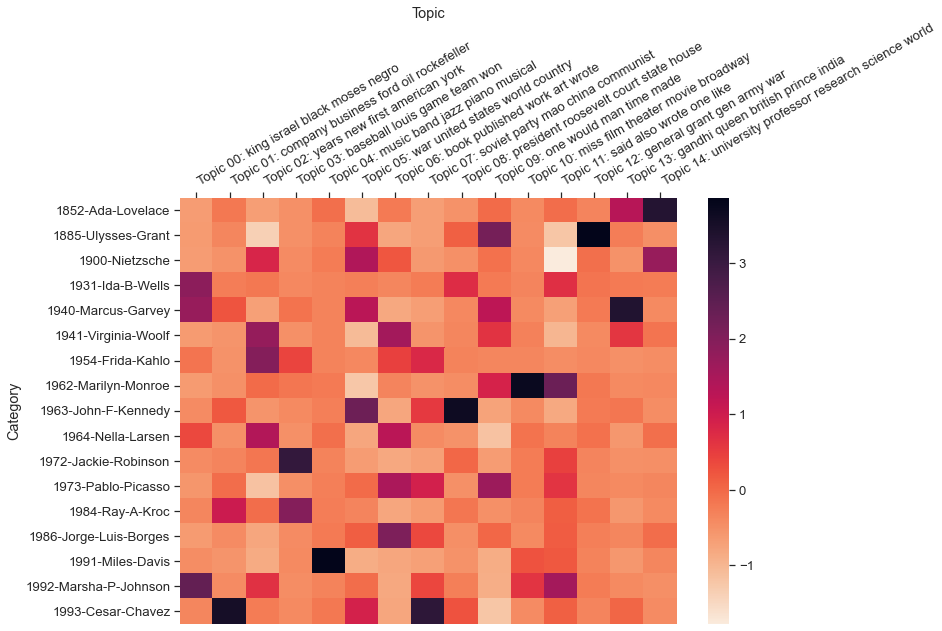

In [78]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(obit_titles,
                                      topic_distributions,
                                      topics,
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim= (13, 9)
                                     )

The darker squares in this heatmap represent a high probability for the corresponding topic (compared to everyone else in the heatmap) and the lighter squares in the heatmap represent a low probability for the corresponding topic. For example, if you scan across the row of Marilyn Monroe, you can see a dark square for the topic “miss film theater movie theater broadway”. If you scan across the row of Ada Lovelace, an English mathematician who is now recognized as the first computer programmer, according to her NYT obituary, you can see a dark square for “university professor research science also”.

The `plot_categories_by_topics_heatmap()` function also helpfully outputs a PDF of the heatmap to `output_directory_path + '/categories_by_topics.pdf'`. We can download this PDF and explore it in more detail or embed it in an article or blog post!

In [80]:
from IPython.display import IFrame
IFrame("topic-model-output/NYT-obits/categories_by_topics.pdf", width=1000, height=600)

### Display Top Titles Per Topic
We can also display the obituaries that have the highest probability for every topic with the little_mallet_wrapper.get_top_docs() function.

Because most of the obituaries in our corpus are pretty long, however, it will be more useful for us to simply display the title of each obituary, rather than the entire document—at least as a first step. To do so, we’ll first need to make two dictionaries, which will allow us to find the corresponding obituary title and the original text from a given training document.

In [82]:
training_data_obit_titles = dict(zip(training_data, obit_titles))
training_data_original_text = dict(zip(training_data, original_texts))

Then we’ll make our own function `display_top_titles_per_topic()` that will display the top text titles for every topic. This function accepts a given topic_number as well as a desired `number_of_documents` to display.

In [83]:
def display_top_titles_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), training_data_obit_titles[document] + "\n")
    return

NOTE: The number of the topic (eg Topic 2, Topic 11) does not correspond to its frequency in the corpus (there is no intrinsic difference between a topic that MALLET assigns as topic 0 and a topic that MALLET assigns as 15, it's just a labelling convention.

**Topic 10**

To display the top 5 obituary titles with the highest probability of containing Topic 10, we will run:

In [85]:
display_top_titles_per_topic(topic_number=10, number_of_documents=5)

✨Topic 10✨

['miss', 'film', 'theater', 'movie', 'broadway', 'films', 'hollywood', 'stage', 'movies', 'actor', 'show', 'made', 'role', 'years', 'actress', 'director', 'star', 'career', 'won', 'acting']

0.4471 1996-Gene-Kelly

0.4361 1995-Ginger-Rogers

0.4192 1992-Shirley-Booth

0.4076 1987-Rita-Hayworth

0.4058 1989-Lucille-Ball



What descriptive label would you give to Topic 10? Click the cell below to assign one

Topic 10 : [DOUBLE-CLICK HERE TO TYPE IN A LABEL]

**Topic 7**

To display the top 5 obituary titles with the highest probability of containing Topic 7, we will run:

In [88]:
display_top_titles_per_topic(topic_number=7, number_of_documents=5)

✨Topic 7✨

['soviet', 'party', 'mao', 'china', 'communist', 'union', 'chinese', 'stalin', 'moscow', 'deng', 'chiang', 'political', 'khrushchev', 'military', 'france', 'economic', 'communists', 'revolution', 'leader', 'american']

0.4265 1997-Deng-Xiaoping

0.3632 1975-Chiang-Kai-shek

0.3609 1982-Leonid-Brezhnev

0.3341 1971-Khrushchev

0.3303 1989-Andrei-A-Gromyko



Topic 7 : [DOUBLE CLICK HERE TO TYPE IN A LABEL]

**Topic 14**

To display the top 5 obituary titles with the highest probability of containing Topic 14, we will run:

In [91]:
display_top_titles_per_topic(topic_number=14, number_of_documents=5)

✨Topic 14✨

['university', 'professor', 'research', 'science', 'world', 'life', 'work', 'scientific', 'human', 'society', 'institute', 'lindbergh', 'prize', 'theory', 'oppenheimer', 'philosophy', 'atomic', 'child', 'children', 'schweitzer']

0.522 1960-Beno-Gutenberg

0.4617 1950-A-J-Dempster

0.4462 1954-Enrico-Fermi

0.435 1946-C-E-M-Clung

0.43 1967-Gregory-Pincus



Topic 14 : [DOUBLE-CLICK HERE TO TYPE IN A LABEL]

### Display Topic Words in Context of Original Text

Often it’s useful to actually look at the document that has ranked highly for a given topic and puzzle out why it ranks so highly.

To display the original obituary texts that rank highly for a given topic, with the relevant topic words **bolded** for emphasis, we are going to make the function `display_bolded_topic_words_in_context()`.

In the cell below, we’re importing two special Jupyter notebook display modules, which will allow us to make the relevant topic words bolded, as well as the regular expressions library re, which will allow us to find and replace the correct words.

In [96]:
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        
        print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")
        
        probability = f"✨✨✨\n\n**{probability}**"
        obit_title = f"**{training_data_obit_titles[document]}**"
        original_text = training_data_original_text[document]
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text:
                original_text = re.sub(f"\\b{word}\\b", f"**{word}**", original_text)

        display(Markdown(probability)), display(Markdown(obit_title)), display(Markdown(original_text))
    return

**Topic 3**

To display the top 3 original obituaries with the highest probability of containing Topic 3 and with relevant topic words bolded, we will run:

In [97]:
display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3)

✨Topic 3✨

['baseball', 'louis', 'game', 'team', 'won', 'ruth', 'year', 'first', 'tennis', 'world', 'football', 'league', 'abbott', 'club', 'record', 'champion', 'black', 'three', 'golf', 'babe']



✨✨✨

**0.7654320987654321**

**1941-Lou-Gehrig**

June 3, 1941

 OBITUARY

 Gehrig's Impressive Records

 By THE NEW YORK TIMESThe major records that Gehrig made:

 Most consecutive games--2,130.

 Most consecutive years, 100 games or more--14.

 Most years, 150 games or more--12.

 Most years, 100 runs or more--13.

 Most consecutive years, 100 runs or more--13.

 Most years, 100 or more runs batted in--13 (tied with Ruth).

 Most years, 150 or more runs batted in--7.

 Most consecutive years, 100 or more runs batted in--13.

 Most runs batted in, one season--184 (American League).

 Most times, four long hits in one **game**--5.

 Most years, 400 or more total bases--5.

 Most years, 300 or more total bases--13.

 Most home runs with bases filled--23.

 Most consecutive home runs in one **game**--4 (modern **record**).

 Most total bases, one **game** (modern **record**)--16 (tied with Ruth and Klein).

 Most years, leading **league**, runs batted in--5 (tied with Ruth).

 Most years, leading **league** games played, season--8.

 First baseman participating in most double plays, season--157.

 World Series

 Highest batting percentage, total series--.361 (7 series).

 Most runs, one series--9 (tied with Ruth).

 Most runs batted in, total series--35.

 Most runs batted in, one series--9.

 Most home runs, one four-**game** series--4.

 Most home runs, 3 consecutive games--4.

 Most extra bases on long hits, one series--13.

 



✨Topic 3✨

['baseball', 'louis', 'game', 'team', 'won', 'ruth', 'year', 'first', 'tennis', 'world', 'football', 'league', 'abbott', 'club', 'record', 'champion', 'black', 'three', 'golf', 'babe']



✨✨✨

**0.5938069216757742**

**1955-Cy-Young**

November 5, 1955

 OBITUARY

 Cy Young Is Dead; Famed Pitcher, 88

 BY THE NEW YORK TIMES

 NEWCOMERSTOWN, Ohio, Nov. 4 (AP)--Denton True (Cy) Young, one of **baseball**'s great pitchers, died today at the age of 88.

 A member of **baseball**'s Hall of Fame, Mr. Young was stricken while sitting in a chair in the home of Mr. and Mrs. John Benedum, with whom he made his home near here.

 His Feats Unequaled

 Traded to the majors from the minors for a suit of clothing, Cy Young thrilled the **baseball** **world** from 1890 to 1911 with a blazing fast ball that set pitching records still unequaled.

 Six feet two inches tall and weighing 210 pounds, this Ohio farmer pitched and **won** more games than any major leaguer. When he retired at the age of 45 because his legs had weakened, he had **won** 511 of 826 decisions in both leagues and for five teams. In all, he hurled in 906 games.

 As the starting pitcher for the Boston Red Sox in 1903, Mr. Young threw the **first** pitch in a **world** series **game**. Fifty years later, as a guest at the opening **game** of the **world** series between the Brooklyn Dodgers and New York Yankees, he stood in the pitcher's box and threw a ceremonial strike to the Yankee catcher, Yogi Berra, to open the series. He was 86 at the time.

 During his career, he was a thirty-**game** winner five seasons; a twenty-**game** victor sixteen times. He pitched one perfect **game**, two other no-hit shutouts and performed the "iron man" feat of hurling and winning complete games of a doubleheader.

 One of the early members of the **baseball** Hall of Fame at Cooperstown, N.Y., Mr. Young pitched for the Cleveland Nationals, St. Louis Cardinals, Red Sox and Cleveland Indians and Boston Braves. He **won** 291 National League games and 220 in the American.

 Had 36-10 Mark in 1892

 For fourteen consecutive years, beginning in 1891, Mr. Young **won** twenty or more games. The 1892 season, when he posted a 36-10 **record**, was his best.

 Mr. Young's feat of pitching twenty-**three** consecutive hitless innings over a four-**game** span early in 1904 still stands as a major **league** **record**. His total of 2,836 strikeouts was surpassed only by the late Walter Johnson's 3,497.

 He was born on a farm in Gilmore, Ohio, on March 29, 1867. While pitching for the Canton (Ohio) **club** of the old Tri-State League in 1890, Mr. Young was nicknamed Cy. "I thought I had to show all my stuff," he recalled years later, "and

 I almost tore the boards off the grandstand with my fast ball. One of the fellows called me 'Cyclone,' but finally shortened it to 'Cy,' and it's been that ever since."

 The **league** disbanded during the 1890 season and the pitcher joined the Cleveland Nationals early in August of that **year**.

 Pitched, Won Doubleheader

 Still a gawky country boy, he made his major **league** debut against Cap Anson's Chicago White Stockings and **won** the **game**. Mr. Young **won** 10 and lost 7 for Cleveland during the late stages of the season. Two of those victories were obtained on Oct. 4, when he captured both ends of a doubleheader against Philadelphia.

 In his **first** complete major **league** campaign the next **year**, Mr. Young **won** 27 and lost 22 games. For the next thirteen seasons he stayed above the .500 mark. He pitched his **first** major **league** no- hit, no-run contest on Sept. 18, 1897, blanking Cincinnati, 6 to 0. His affiliation with Cleveland ended after the 1898 campaign and he played with the St. Louis Cardinals in 1899 and 1900.

 Mr. Young began eight years with the Red Sox in 1901. While blanking Philadelphia on May 5, 1904, he did not permit an opposing runner to reach **first** base. It was the third perfect **game** in major **league** history. On June 30, 1908, he **won** his third no-hit, no-run decision in the majors by shutting out New York, 8 to 0.

 He was traded to the Cleveland Indians in 1909, and in the middle of the 1911 campaign was traded to the Braves. He retired to his farm near Peoli, Ohio, after that season.

 



✨Topic 3✨

['baseball', 'louis', 'game', 'team', 'won', 'ruth', 'year', 'first', 'tennis', 'world', 'football', 'league', 'abbott', 'club', 'record', 'champion', 'black', 'three', 'golf', 'babe']



✨✨✨

**0.5646053293112117**

**1985-Roger-Maris**

December 15, 1985

 OBITUARY

 Roger Maris is Dead at 51, Set Record Home Runs

 By JOSEPH DURSO

 Roger Maris, who held the major **league** **record** for the most home runs in a single season, died yesterday at M. D. Anderson Hospital and Tumor Institute in Houston after a two-**year** bout with cancer, hospital officials said. He was 51 years old.

 During the early 1960's when the New York Yankees reigned for five straight pennant-winning seasons, Roger Maris was all things to all people. But **baseball** history will remember him as the home-run twin to Mickey Mantle, and generations of fans will remember him as the man with the asterisk in the **record** books: *Hit 61 home runs in 1961 in a 162-**game** season.

 The asterisk was inserted to distinguish Maris's home-run **record** from the one set in 1927 by the greatest Yankee of them all: Babe Ruth, who hit 60 in the days of the 154-**game** season.

 It was inserted into the **record** books by Ford C. Frick, the commissioner of **baseball**, who apparently reflected the traditionalist view of many fans that the Olympian feats of Babe Ruth must be defended against long seasons, short fences and newly arrived sluggers -even one who eventually played in seven World Series and hit 275 home runs in 12 seasons in the big leagues.

 Set Mark on Final Day

 But, on Oct. 1. 1961, asterisk or no asterisk, Roger Maris made history when he hit his 61st home run of the season in his 161st **game** on the final day of the 162-**game** season in Yankee Stadium against

 Tracy Stallard of the Boston Red Sox.

 It was the rousing end to a rousing season, and it ended with the Yankees winning the pennant race before roaring sellout crowds and swarms of writers and broadcasters drawn by Mantle and Maris, the power hitters on yet another great Yankee **team**. Mantle, who was injured in September, still managed to hit 54 home runs, so the ''twins'' combined for an awesome total of 115.

 But Maris, an accomplished outfielder with a powerful arm and bat, was besieged as he pursued the memory and the **record** of Ruth.

 And yet, Maris was not universally embraced for his achievement. The Yankees received 3,000 messages a day during the final weeks of the season, many of them cheering him on. But the commissioner, a onetime colleague of Babe Ruth, announced that any **record** would have to be set in 154 games. And Rogers Hornsby, the Hall of Fame slugger, who also had been a contemporary of Ruth, said in the passion of the day: ''Maris has no right to break Ruth's **record**.''

 Maris had no ''right'' to break Ruth's **record** ostensibly because he was none of the things that had made Babe Ruth renowned as the Bambino. He was imported to the Yankees from the Kansas City Athletics, a stocky figure with a blond crewcut, and he was playing only his second season in the celebrated pinstripes. He was considered an upstart in the House That Ruth Built, and the house that Mantle dominated. He was dour, aloof, sometimes arch, and in no way the flamboyant bear portrayed by Babe Ruth.

 His manager in 1960, Casey Stengel, once said: ''You ask Maris a question, and he stares at you for a week before he answers.'' ''I was born surly,'' Maris acknowledged in 1961 when the home-run race had ended, ''and I'm going to stay that way. Everything in life is tough. ''Even the Yankee clubhouse attendants think I'm tough to live with. I guess they're right. I'm miffed most of the time, regardless of how I'm doing. But, regardless of my faults, I'll never take abuse from anybody - big or small, important or unimportant - if I think it's undeserved.''

 Star Athlete in School

 Roger Eugene Maris was born in Hibbing, Minn., on Sept. 10, 1934, but was still an infant when his family moved to Fargo. N.D. The family name was Maras, but he changed it legally in 1955 to Maris.

 He was an outstanding athlete at Shanley High School, a star in basketball and track and an all-state halfback in **football**. The school had no **baseball** **team**, but he played American Legion ball and became a star there, too.

 When he graduated from high school, the University of Oklahoma offered Maris a **football** scholarship, but a scout for the Cleveland Indians persuaded him to try for a **baseball** career. He offered a $5,000 bonus and $10,000 more if Maris made the big leagues, and Maris signed.

 It didn't take him long to redeem the full bonus. He broke into professional ball in 1954 in Keokuk, advanced in 1955 to Reading, then in 1956 to Indianapolis in the American Association, one notch below the majors. One **year** later, in 1957, he was playing outfield for the Indians.

 Traded to the Yankees

 But on June 15, 1958, he was traded to the Kansas City Athletics with Dick Tomanek and Preston Ward for Vic Power and Woodie Held. And a **year** and a half later, on Dec. 11, 1959, with some recognition as a blooming power hitter, he was traded to New York with Joe DeMaestri and Kent Hadley for Don Larsen, Hank Bauer, Norm Siebern and Marv Throneberry. He was 25 years old and a Yankee.

 It didn't take Maris long to ''join the **club**.'' In his debut in 1960, he hit a single, double and two home runs. He finished the season with 39 home runs, and the Yankees **won** the American League pennant and began a streak of five straight pennants.

 In 1961, the season that made him both famous and controversial, he posted these numbers: 161 games, 590 times at bat, 159 hits, 94 walks, 67 strikeouts, 132 runs scored, 142 runs batted in, a batting average of .269 -and 61 home runs.

 But, if 1961 was a difficult time for Maris, he soon found that 1962 was an ordeal. He was engulfed wherever he went, cheerleaders asking if he could hit more than 61 home runs, critics asking why not.

 He hit 33.

 Yankees' Era Ends

 After 1964, the Yankees stopped winning pennants after an extraordinary run of 14 in 16 years. Maris, meanwhile, endured several seasons of injuries to his back, hand and legs, and said later that he was outraged by intimations that he had been exaggerating his ailments. On Dec. 8, 1966, he was traded to the St. Louis Cardinals, where he again distinguished himself as a professional with a strong right-handed throwing arm from right field and a strong left-handed swing at the plate.

 He played in the World Series of 1967 and 1968 for the Cardinals, and then retired at the close of the 1968 season. His career line, with no asterisk, read: 12 years in the big leagues, 1,463 games, 5,101 times at bat, 1,325 hits, 275 home runs, 826 runs, 851 runs batted in and an average of .260. In seven World Series, he hit six home runs.

 For many years, Maris lived in Independence, Mo., with his wife, the former Patricia Carvell, and their six children. After retiring from **baseball**, he lived in Gainesville, Fla., where he owned a beer distributorship.

 For a while, he shunned old-timers' games, because he resented the criticism and controversy from his playing days. But he began to appear at reunions later, and he remained close friends with Mantle,

 Whitey Ford, Yogi Berra, Tony Kubek and his other teammates from the time when the Yankees ruled the day.

 Funeral services will be held at noon Thursday at St. Mary's Cathedral in Fargo, N.D.

 



## Exercise 2: Visualizing and analyzing topics

## Your Turn!

Choose a topic from the results above and write down its corresponding topic number below.

**Topic: [Your Number Choice Here]**

1. Display the top 6 obituary titles for this topic.

In [98]:
# Your Code Here

2. Display the topic words in the context of the original obituary for these 6 top titles.

In [99]:
# Your Code Here

3. Come up with a label for your topic and double-click on the cell below to write it down:

4. Why did you label your topic the way you did? What do you think this topic means in the context of all the *NYT* obituaries?

5. What’s another collection of texts that you think might be interesting to topic model? Why?